### Intelligent Property Analyser
#### 1.Data Collection
#### 2. Data Preprocessing as per requirement
#### 3. Model Selection
#### 4. Training the Model
#### 5. Evaluting the model with test data
#### 6. Parameter tuning 
#### 7. Making prediction

In [1]:
#importing some necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [2]:
# Now we need load the dataset
df= pd.read_csv("C:/Users/Nikhil/PycharmProjects/TCSProject/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Preprocessing the dataset

In [7]:
lb =LabelEncoder()
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
dms = pd.get_dummies(df[["furnishingstatus"]])
dms.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
df=pd.concat([df, dms], axis=1)
df.rename({'semi-furnished': 'semi_furnished'}, axis=1, inplace=True)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,0,1


In [10]:
df=df.drop(['furnishingstatus'], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


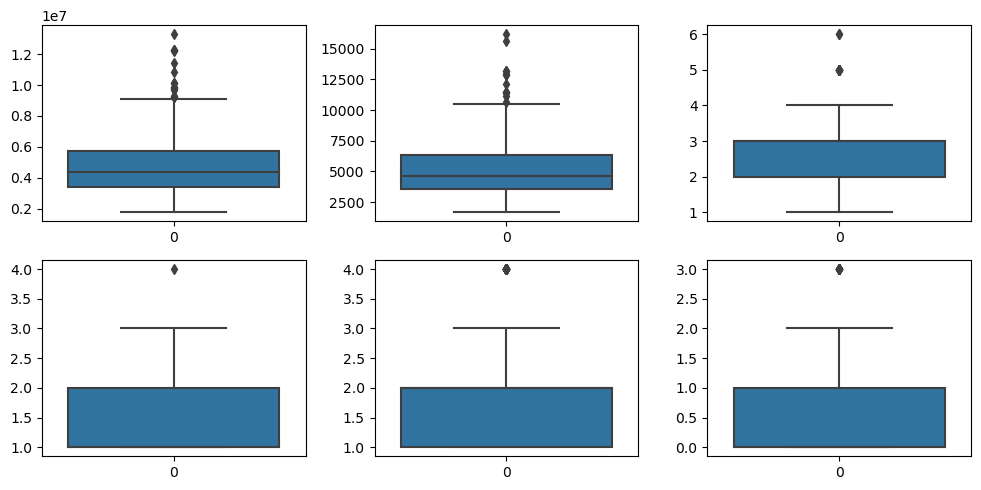

In [11]:
ig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

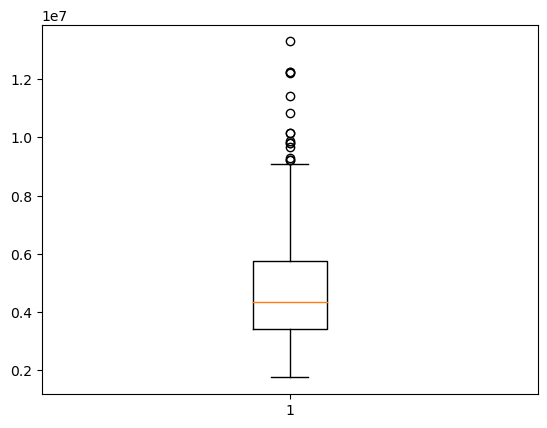

In [12]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

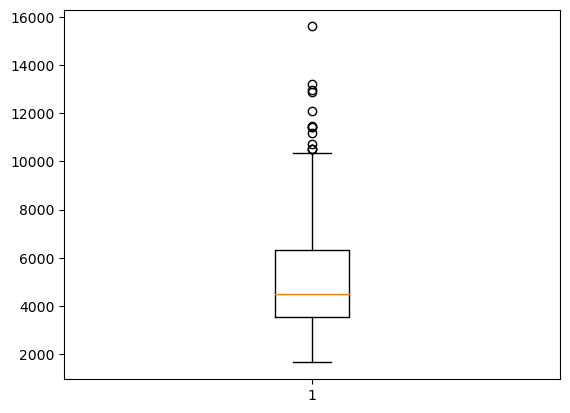

In [13]:
plt.boxplot(df.area)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

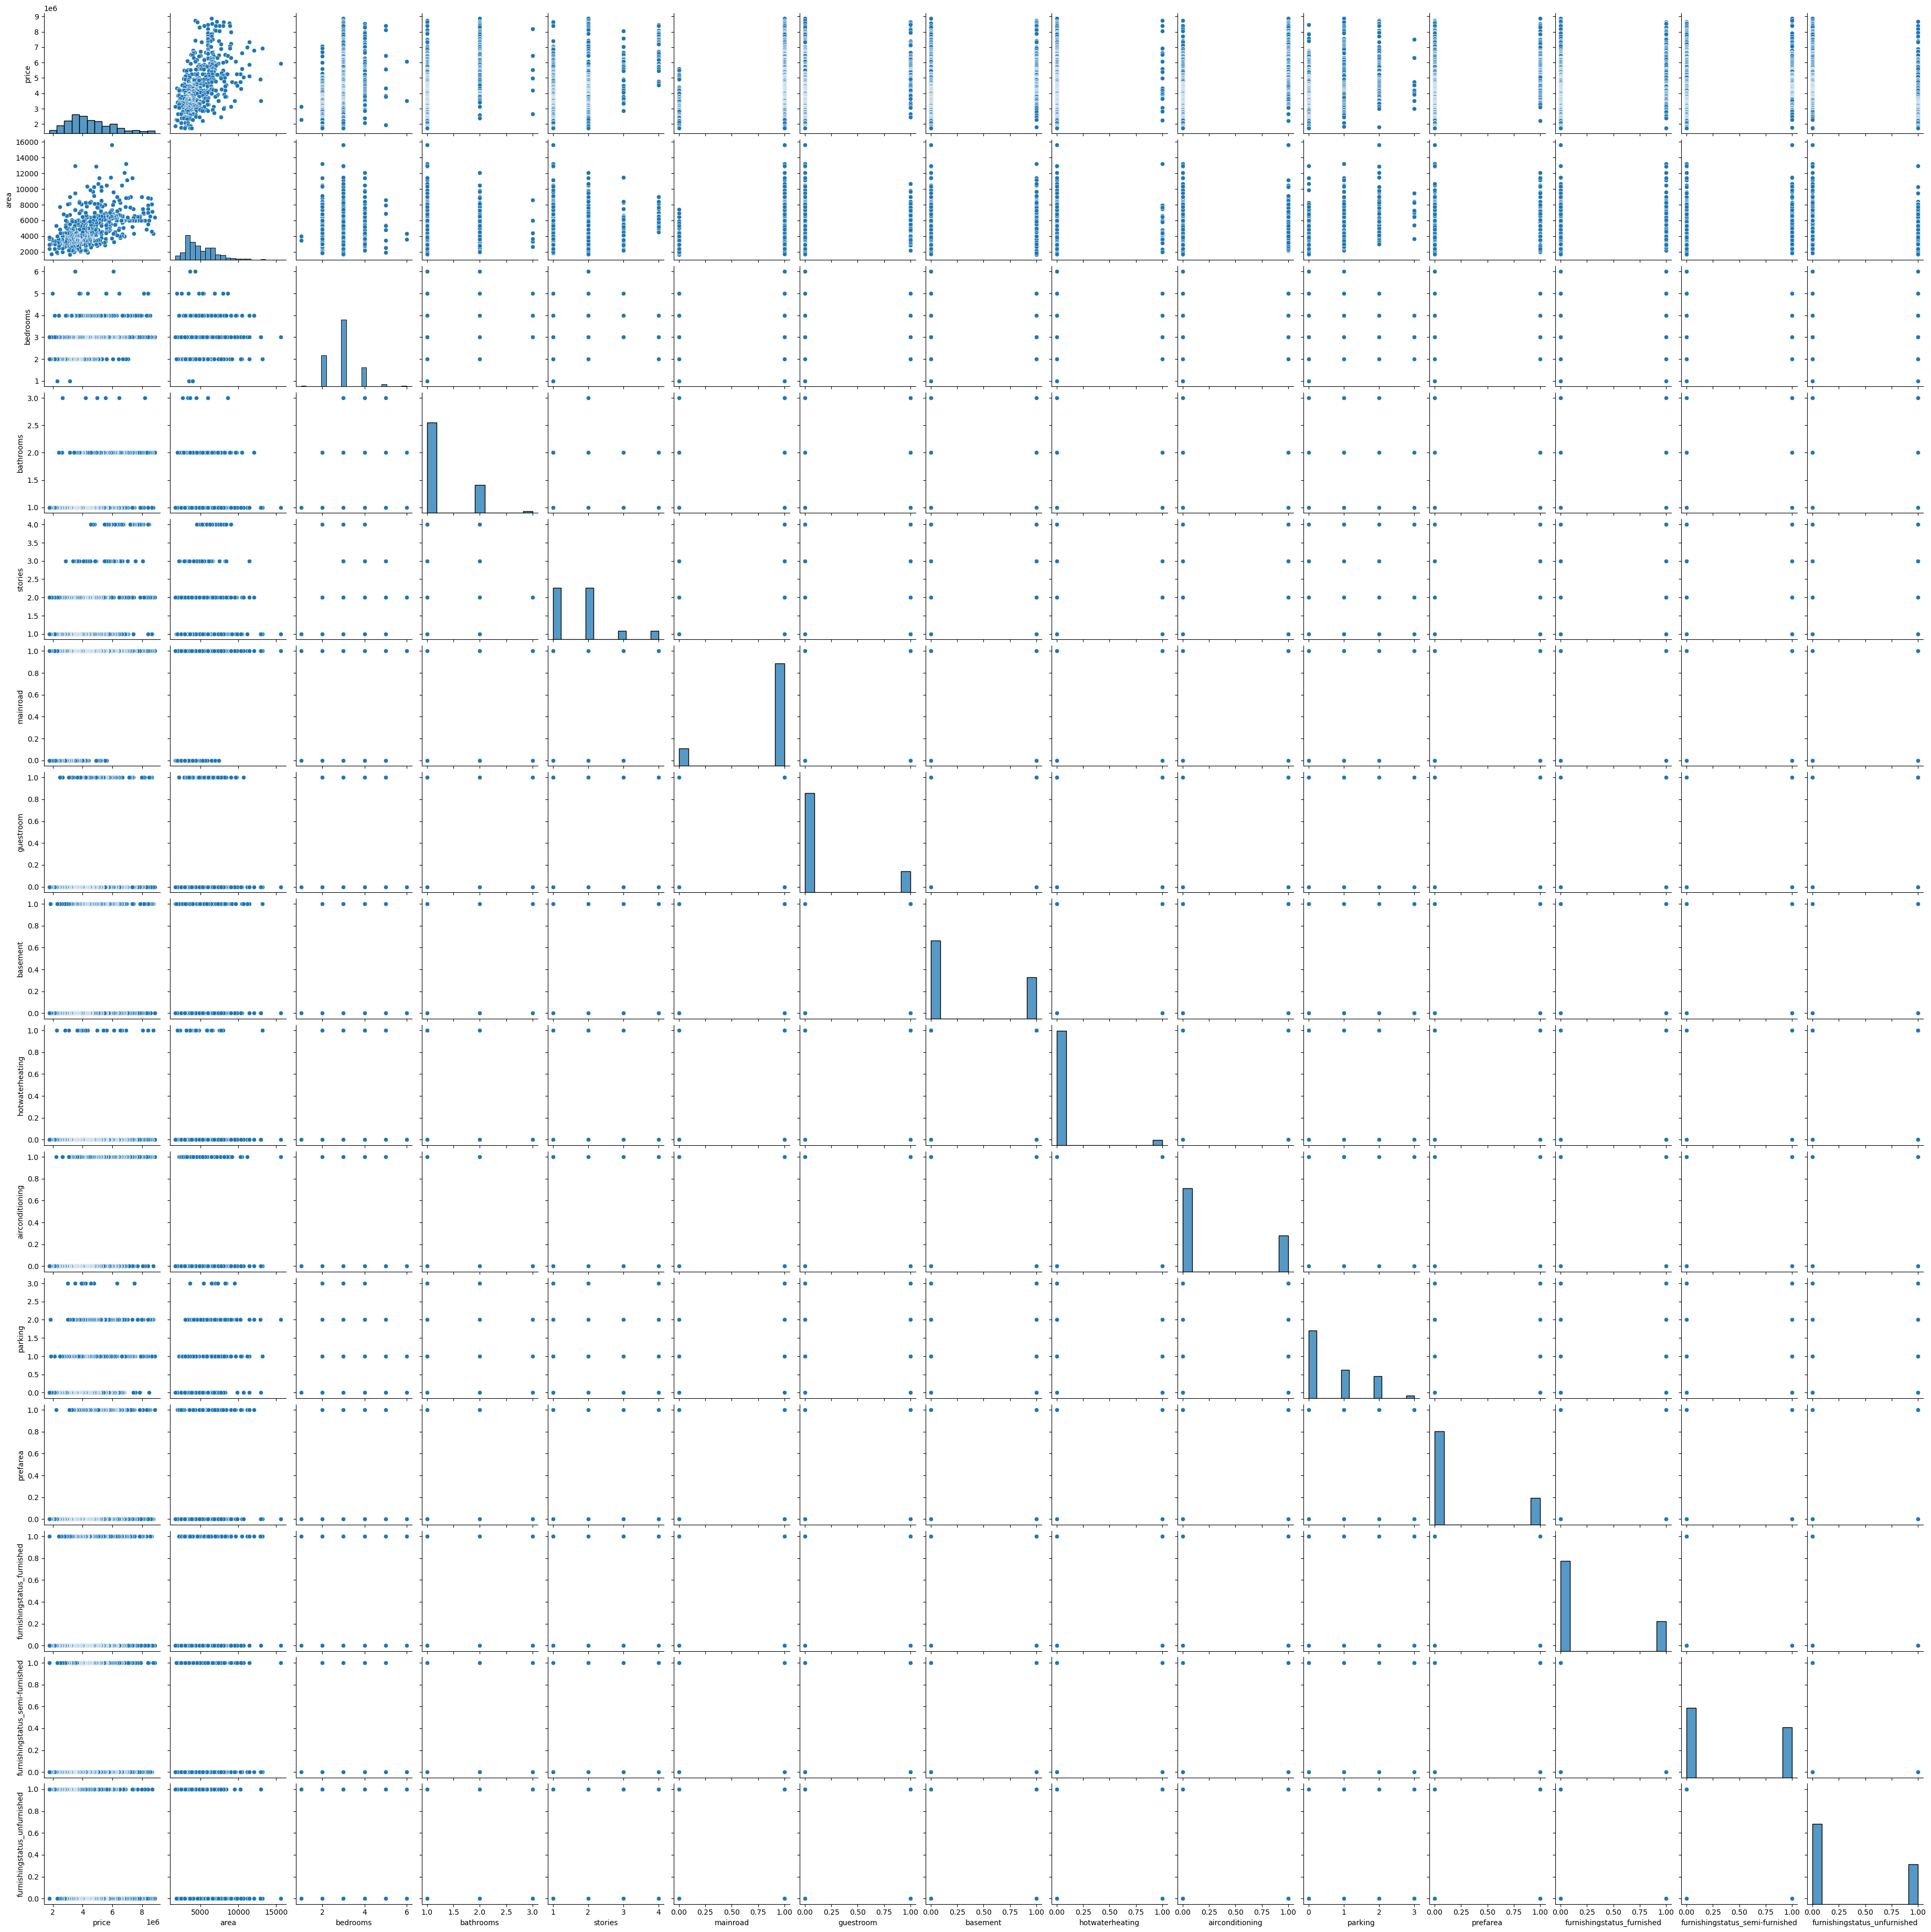

In [14]:
sns.pairplot(df)
plt.show()

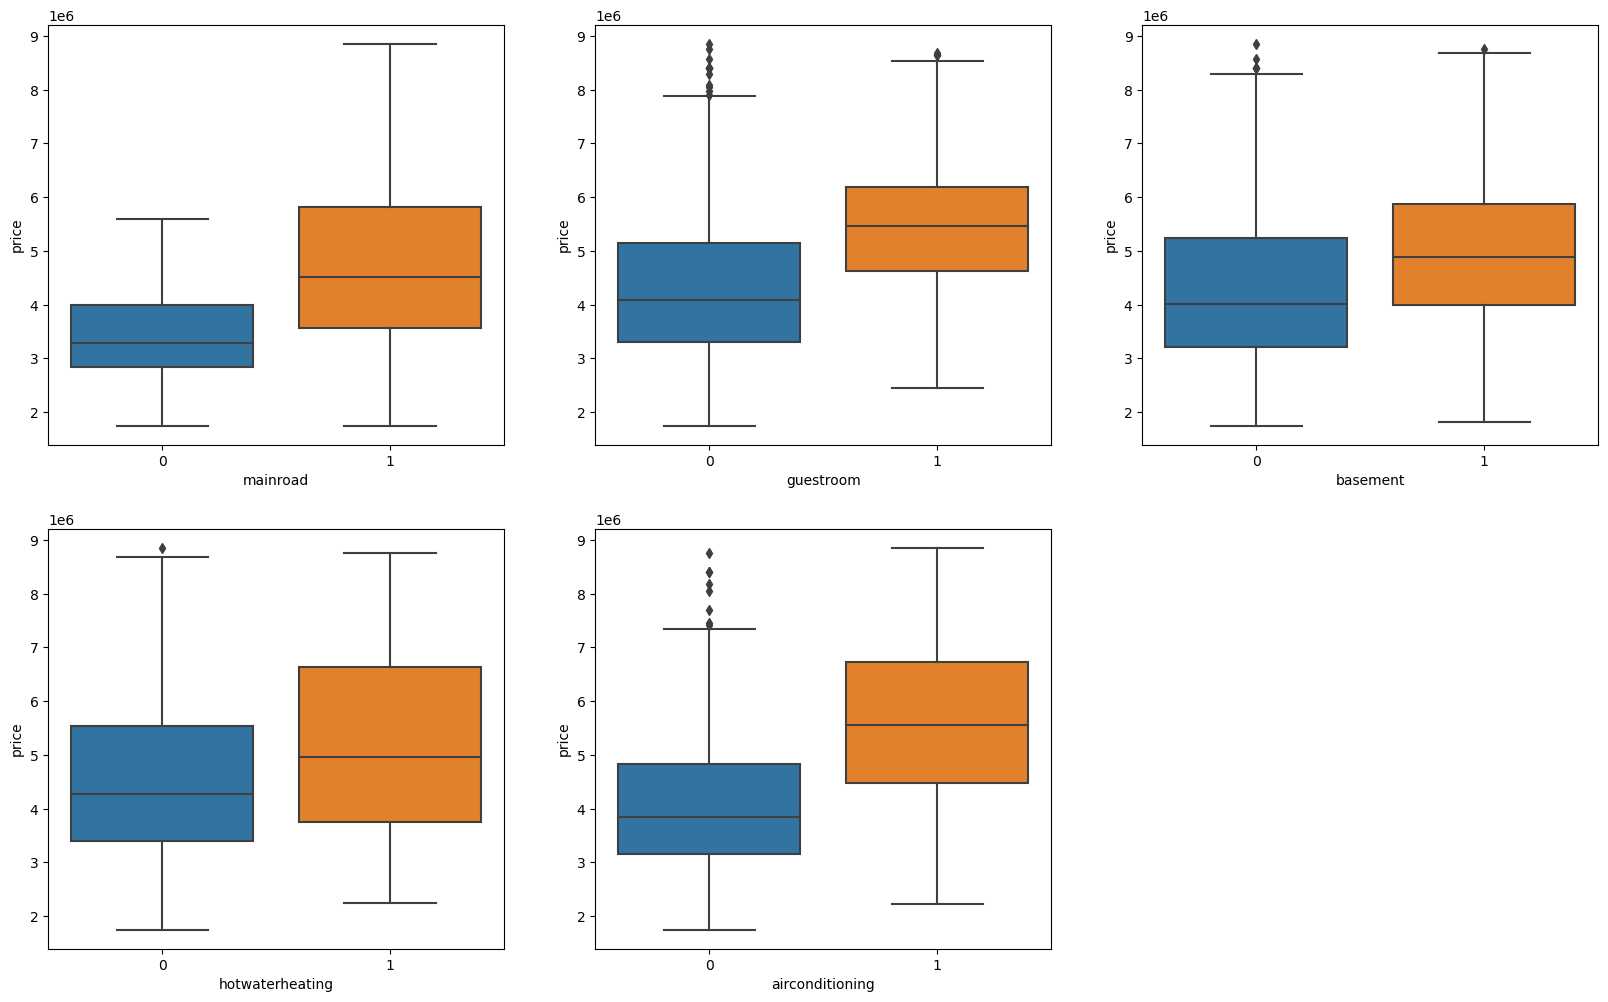

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
#plt.subplot(2,3,6)
#sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

## Train-Test Splitting

In [17]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [18]:
from sklearn.model_selection import train_test_split
train_set,test_set =train_test_split(df, test_size =0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")


Rows in train set:420
Rows in test set:106



In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
df.dropna(subset=["basement"], inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["basement"]):
    df = df.reset_index()
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [20]:
strat_test_set.describe()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,291.198113,4.442590e+06,4820.877358,2.962264,1.254717,1.773585,0.820755,0.141509,0.349057,0.037736,0.292453,0.613208,0.226415,0.245283,0.386792,0.367925
std,152.346561,1.498663e+06,1875.184830,0.702709,0.459012,0.853932,0.385380,0.350202,0.478936,0.191462,0.457050,0.799652,0.420499,0.432299,0.489329,0.484532
min,24.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.500000,3.360000e+06,3457.500000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,305.500000,4.179000e+06,4320.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,421.500000,5.516000e+06,6000.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,544.000000,8.575000e+06,11175.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
corr_matrix = df.select_dtypes(include=np.number).corr()

corr_matrix["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
area,0.512801
airconditioning,0.458907
bathrooms,0.452676
stories,0.430699
bedrooms,0.326890
parking,0.312787
mainroad,0.311438
prefarea,0.301001
guestroom,0.283291


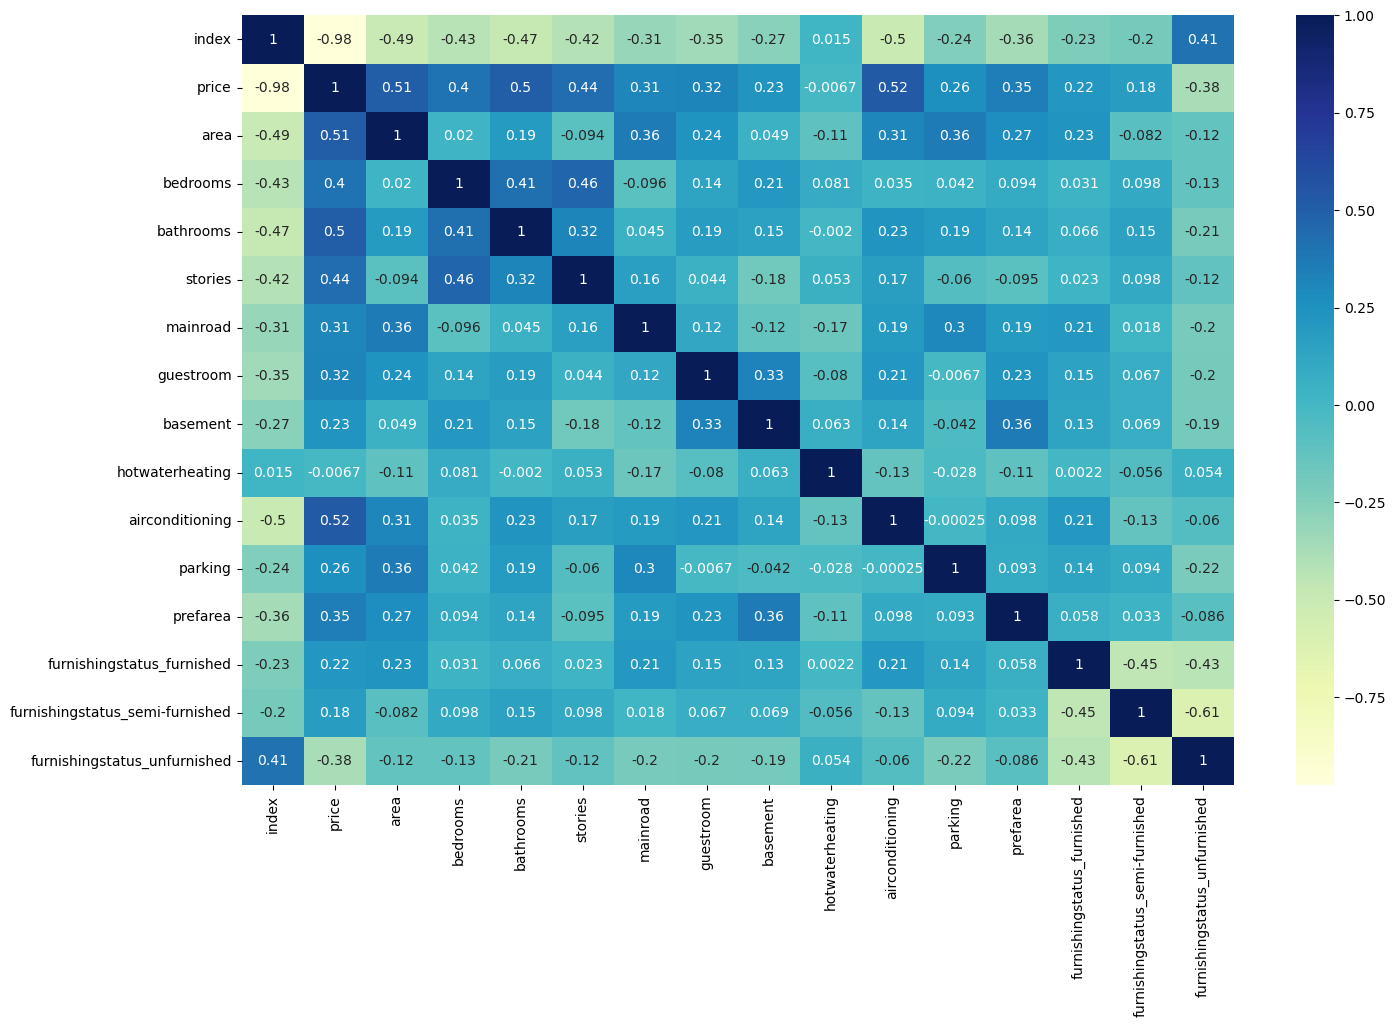

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(strat_test_set.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

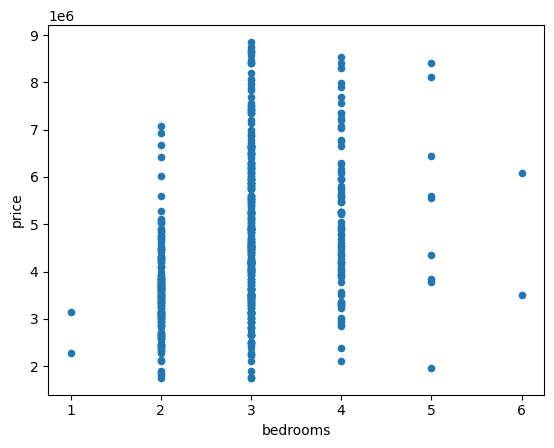

In [23]:
df.plot(kind ="scatter",x="bedrooms",y="price",alpha=1)

In [24]:
c=['area','bathrooms','airconditioning','stories','parking','bedrooms','prefarea']
for i in c:
    print(df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement']])

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement
0    6420         3          2        2         1          0         0
1    4320         3          1        2         1          0         1
2    7155         3          2        1         1          1         1
3    8050         3          1        1         1          1         1
4    4560         3          2        2         1          1         1
..    ...       ...        ...      ...       ...        ...       ...
521  3000         2          1        1         1          0         1
522  2400         3          1        1         0          0         0
523  3620         2          1        1         1          0         0
524  2910         3          1        1         0          0         0
525  3850         3          1        2         1          0         0

[526 rows x 7 columns]
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement
0    6420         3          2        2         1    

In [25]:

#df = pd.DataFrame(df)

# remove all rows containing NaN values
#df = df.dropna()

# remove all columns containing NaN values
#df = df.dropna(axis=1)

# replace all NaN values with a specified value (e.g. 0)
#df = df.fillna(0)


<Axes: xlabel='area', ylabel='price'>

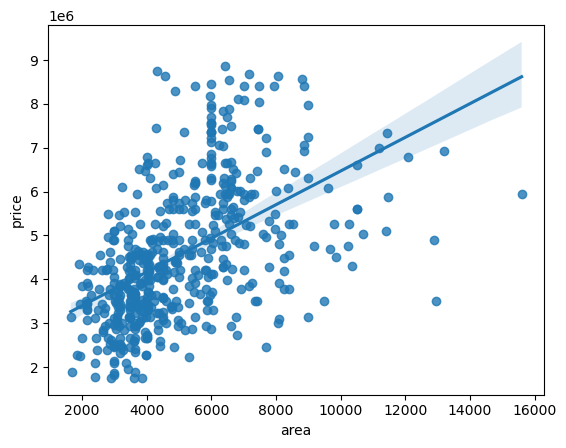

In [26]:
sns.regplot(x='area', y='price', data=df)

In [27]:
x = df.drop('price', axis = 1)
y = df['price']
x.head()

,index,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,19,6420,3,2,2,1,0,0,0,1,1,1,0,1,0
1,20,4320,3,1,2,1,0,1,1,0,2,0,0,1,0
2,21,7155,3,2,1,1,1,1,0,1,2,0,0,0,1
3,22,8050,3,1,1,1,1,1,0,1,1,0,1,0,0
4,23,4560,3,2,2,1,1,1,0,1,1,0,1,0,0


In [28]:
y.head()

0    8855000
1    8750000
2    8680000
3    8645000
4    8645000
Name: price, dtype: int64

### Model Training

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
mask = ~np.isnan(y_train)
x_train = x_train[mask]
y_train = y_train[mask]




In [31]:
print(f"""
Shape of X Train: {x_train.shape}
Shape of Y Train: {y_train.shape}
Shape of X Test:  {x_test.shape}
Shape of Y Test:  {y_test.shape}
""")


Shape of X Train: (368, 15)
Shape of Y Train: (368,)
Shape of X Test:  (158, 15)
Shape of Y Test:  (158,)



In [32]:
from sklearn.linear_model import LinearRegression 
model= LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [33]:
linear_reg_mod= model.fit(x_train, y_train)

In [34]:
y_train_pred = linear_reg_mod.predict(x_train)
y_train_pred = pd.DataFrame(y_train_pred)

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,9.472958e-01
MAE,2.522345e+05
MSE,1.221193e+11
RMSE,3.494557e+05


In [36]:
y_pred = linear_reg_mod.predict(x_test)
y_pred = pd.DataFrame(y_pred)

In [37]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten()
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using Linear Regression Model')
Prediction.head(10)

Prediction using Linear Regression Model


,Actual Price,Predicted Price
0,2100000,2.088947e+06
1,2870000,2.611365e+06
2,2380000,2.157318e+06
3,2730000,2.540647e+06
4,4060000,4.109290e+06
5,4410000,4.598295e+06
6,4382000,4.619372e+06
7,4900000,5.105404e+06
8,2940000,2.662274e+06
9,2870000,2.440030e+06


### Ridge Regression 

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)


Ridge(alpha=0.5)

In [39]:
y_train_pred = ridge.predict(x_train)

In [40]:
y_train_pred = pd.DataFrame(y_train_pred)
R2 = metrics.r2_score(y_train , y_train_pred)
MAE = metrics.mean_absolute_error(y_train , y_train_pred)
MSE = metrics.mean_squared_error(y_train , y_train_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Training Scores'])

,Training Scores
R2 Score,9.472908e-01
MAE,2.517688e+05
MSE,1.221310e+11
RMSE,3.494724e+05


In [41]:
y_pred = ridge.predict(x_test)
y_pred = pd.DataFrame(y_pred)
R2 = metrics.r2_score(y_test , y_pred).round(5)
MAE = metrics.mean_absolute_error(y_test, y_pred).round(2)
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE).round(2)
pd.DataFrame([R2, MAE, MSE, RMSE], index=['R2 Score', 'MAE', 'MSE', 'RMSE'], columns=['Testing Scores'])


,Testing Scores
R2 Score,9.457500e-01
MAE,2.680561e+05
MSE,1.429553e+11
RMSE,3.780944e+05


In [42]:
Prediction = {'Actual Price' : np.array(y_test), 
            'Predicted Price' : np.array(y_pred).flatten().round(2)
           }

Prediction = pd.DataFrame(Prediction)
print('Prediction using Ridge Regression Model')
Prediction.head(10)

Prediction using Ridge Regression Model


,Actual Price,Predicted Price
0,2100000,2094044.01
1,2870000,2611945.43
2,2380000,2162949.51
3,2730000,2545115.15
4,4060000,4115965.98
5,4410000,4593047.06
6,4382000,4620573.08
7,4900000,5100691.86
8,2940000,2663802.00
9,2870000,2445176.18


### Evaluation Model

In [43]:
linear_reg_mod.intercept_

4556209.076086956

In [44]:
linear_reg_mod.coef_

array([-1436021.78851924,    18565.20498121,   -24404.22176154,
          68381.63040547,    20615.8150258 ,   -13310.48203963,
          -7323.13592541,   -43786.09227288,    22852.11600893,
          60148.76751415,    27635.5959346 ,     8379.39966457,
           5880.87061603,   -45319.37182238,    42165.40816176])

In [45]:
ridge.intercept_

4556209.076086956

In [46]:
ridge.coef_

array([-1429903.74399519,    20434.21060965,   -23947.08425063,
          69407.26670447,    22185.00611939,   -12643.29208456,
          -6898.23090543,   -42914.90249214,    23159.46333307,
          61450.27910963,    28252.60126836,     9342.8235063 ,
           6137.66479601,   -44865.06330556,    41445.31934332])

### Model

In [77]:
from joblib import dump
dump(linear_reg_mod , 'C:/Users/Nikhil/PycharmProjects/TCSProject/HousePricePrediction/template/model1.joblib')

['C:/Users/Nikhil/PycharmProjects/TCSProject/HousePricePrediction/template/model1.joblib']

In [76]:
import pickle
from joblib import dump
dump(ridge, 'C:/Users/Nikhil/PycharmProjects/TCSProject/HousePricePrediction/template/rid.pkl')

['C:/Users/Nikhil/PycharmProjects/TCSProject/HousePricePrediction/template/rid.pkl']

In [63]:
print(pickle.format_version)

4.0


In [75]:
import sys
print(sys.version)


3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
